In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#from astropy.cosmology.funcs import distmod
from astropy.cosmology import WMAP9 as cosmo
from astropy.constants import c
from astropy import units as u

//anaconda/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
table_path = '/Users/rfinn/Dropbox/Research/APPSS/SDSSphot/run_sep14/'
latest_run = 'a100.code12.SDSSvalues170914.csv'
infile = table_path+latest_run

sdss = np.recfromcsv(infile)

agc_cross = 'a100.sdsscross.code12.170914.csv'
agc = np.recfromcsv(table_path+agc_cross)


In [5]:
dist = agc['sdss_z']*c.to('km/s')/cosmo.H(0)
distmod = 5*np.log10(dist*1.e6/u.Mpc)-5

/anaconda/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/anaconda/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [6]:
def plotcolormag():
    color = sdss['modelmag_g'] - sdss['modelmag_r']
    plt.figure()
    plt.scatter(sdss['modelmag_r'],color,s=60,c=sdss['petror90_r'],vmin=0,vmax=20)
    cb = plt.colorbar(label='Petro_R90(r)')
    plt.xlabel('r mag')
    plt.ylabel('u - g')


need to plot color vs absolute mag.  using sdss_z from agc catalog.

Looking for fits to red sequence of SDSS

* Blanton+2006: 
    * http://adsabs.harvard.edu/abs/2006ApJ...648..268B
    * http://iopscience.iop.org/article/10.1086/505628/fulltext/
    
    * converts mags to $^{0.1}u$ etc
    
        * $^{0.1}u = u + 0.33 + 0.32[(u-g) = 1.26]$
        * $^{0.1}g = g + 0.32 + 0.25[(u-g) = 1.26]$
    * fits to color-mag relations
        * $^{0.1}u > 1.5 $: $a_0 = 1.72$, $a_1 = -0.06$
        * $^{0.1}u < 1.5 $: $a_0 = 1.16$, $a_1 = -0.13$
    
    

In [8]:
def plot_redsequence():
    xl = np.linspace(-10,-25,20)
    yl = 1.72-0.06*xl
    plt.plot(xl,yl,'r-')
def plotcolorabsmag():
    color = sdss['modelmag_u'] - sdss['modelmag_g']
    absmag = sdss['petromag_r'] - distmod
    plt.figure()
    plt.scatter(absmag,color,s=10,c=sdss['petror90_r'],vmin=0,vmax=20)
    #plt.hexbin(absmag,color)
    cb = plt.colorbar(label='Petro_R90(r)')
    plt.xlabel('$M_r$')
    plt.ylabel('$u - g$')
    plot_redsequence()
    plt.gca().invert_xaxis()
    plt.figure()
    mylimits = [-25,-15,.5,2]
    plt.hexbin(absmag,color,extent=mylimits)
    plot_redsequence()
    plt.axis(mylimits)
    plt.gca().invert_xaxis()
    plt.xlabel('$M_r$')
    plt.ylabel('$u - g$')
    


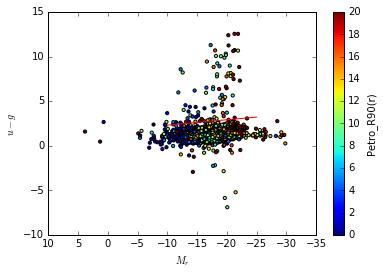

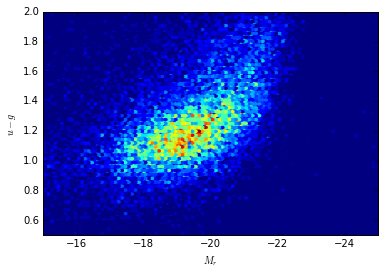

In [9]:
plotcolorabsmag()